# Hyperfine Structure: Rabi Oscillations No Decay

Rb87 5s_{1/2}_F1 -> 5p_{1/2}_F1

## Define the Hyperfine Structure

In [2]:
import numpy as np

In [3]:
from maxwellbloch import hyperfine

width = 5.75000 # [2π MHz]
# E_s12 = 0.
# E_s12_F1 = E_s12 - 4.272e3/width # [2π Γ]
# E_s12_F2 = E_s12 + 2.563e3/width # [2π Γ]
# E_p12 = 0. # 377.107463380e6/width
# E_p12_F1 = E_p12 - 509./width # [2π Γ]
# E_p12_F2 = E_p12 + 305./width # [2π Γ]

Rb87_5s12_F1 = hyperfine.LevelF(I=1.5, J=0.5, F=1)
Rb87_5s12_F2 = hyperfine.LevelF(I=1.5, J=0.5, F=2) # Needed for decay

Rb87_5p12_F1 = hyperfine.LevelF(I=1.5, J=0.5, F=1)

atom1e = hyperfine.Atom1e(element='Rb', isotope='87')

atom1e.add_F_level(Rb87_5s12_F1)
atom1e.add_F_level(Rb87_5s12_F2)
atom1e.add_F_level(Rb87_5p12_F1)

In [4]:
NUM_STATES = atom1e.get_num_mF_levels()
print(NUM_STATES)

11


In [5]:
ENERGIES = atom1e.get_energies()
print(ENERGIES)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
# Tune to be on resonance with the F1 -> F1 transition
DETUNING = 0.#E_p12_F1 - E_s12_F1
print(DETUNING)

0.0


In [7]:
FIELD_CHANNELS = atom1e.get_coupled_levels(F_level_idxs_a=(0,), F_level_idxs_b=(2,))
print(FIELD_CHANNELS)

[[0, 8], [0, 9], [0, 10], [1, 8], [1, 9], [1, 10], [2, 8], [2, 9], [2, 10]]


In [13]:
q = 0 # Field polarisation
FIELD_FACTORS = atom1e.get_clebsch_hf_factors(F_level_idxs_a=(0,), F_level_idxs_b=(2,), q=q)
print(FIELD_FACTORS)
print(np.sum(FIELD_FACTORS**2))

[ 0.28867513  0.          0.         -0.         -0.         -0.
  0.          0.         -0.28867513]
0.16666666666666657


In [14]:
DECAY_CHANNELS = atom1e.get_coupled_levels(F_level_idxs_a=(0,1), F_level_idxs_b=(2,))
print(DECAY_CHANNELS)

[[0, 8], [0, 9], [0, 10], [1, 8], [1, 9], [1, 10], [2, 8], [2, 9], [2, 10], [3, 8], [3, 9], [3, 10], [4, 8], [4, 9], [4, 10], [5, 8], [5, 9], [5, 10], [6, 8], [6, 9], [6, 10], [7, 8], [7, 9], [7, 10]]


In [15]:
DECAY_FACTORS = atom1e.get_decay_factors(F_level_idxs_a=(0, 1), F_level_idxs_b=(2,))
print(DECAY_FACTORS)

[ 0.28867513 -0.28867513  0.          0.28867513 -0.         -0.28867513
  0.          0.28867513 -0.28867513  0.70710678  0.          0.
  0.5         0.5        -0.          0.28867513  0.57735027  0.28867513
 -0.          0.5         0.5         0.          0.          0.70710678]


In [17]:
INITIAL_STATE = (
    [0.5/3.0]*3 + # s12_F1
    [0.5/5.0]*5 + # s12_F2
    [0.0]*3) # p12_F1    
print(INITIAL_STATE)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]


In [18]:
ob_solve_json = """
{{
  "atom": {{
    "decays": [
      {{
        "channels": {decay_channels},
        "rate": 0.0,
        "factors": {decay_factors}
      }}
    ],
    "energies": {energies},
    "fields": [
      {{
        "coupled_levels": {field_channels},
        "factors": {field_factors},
        "detuning": {detuning},
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 30.0,
        "rabi_freq_t_args": {{
          "ampl": 1.0,
          "on": 0.0,
          "off": 1.0
        }},
        "rabi_freq_t_func": "square"
      }}
    ],
    "num_states": {num_states},
    "initial_state": {initial_state}
  }},
  "t_min": 0.0,
  "t_max": 1.0,
  "t_steps": 100,
  "method": "mesolve",
  "opts": {{
    "method": "bdf", 
    "atol": 1e-5, 
    "rtol": 1e-3,
    "nsteps": 1e4
  }},
  "savefile": "qu/ob-solve-rb87_5s12_5p12-rabi-oscillations"
}}
""".format(num_states=NUM_STATES, energies=ENERGIES, initial_state=INITIAL_STATE, detuning=DETUNING, 
    field_channels=FIELD_CHANNELS, field_factors=list(FIELD_FACTORS), decay_channels=DECAY_CHANNELS, decay_factors=list(DECAY_FACTORS))

In [13]:
print(ob_solve_json)


{
  "atom": {
    "decays": [
      {
        "channels": [[0, 8], [0, 9], [0, 10], [1, 8], [1, 9], [1, 10], [2, 8], [2, 9], [2, 10], [3, 8], [3, 9], [3, 10], [4, 8], [4, 9], [4, 10], [5, 8], [5, 9], [5, 10], [6, 8], [6, 9], [6, 10], [7, 8], [7, 9], [7, 10]],
        "rate": 0.0,
        "factors": [0.2886751345948128, -0.2886751345948128, 0.0, 0.2886751345948128, -0.0, -0.2886751345948128, 0.0, 0.2886751345948128, -0.2886751345948128, 0.7071067811865475, 0.0, 0.0, 0.5, 0.5, -0.0, 0.28867513459481287, 0.5773502691896257, 0.28867513459481287, -0.0, 0.5, 0.5, 0.0, 0.0, 0.7071067811865475]
      }
    ],
    "energies": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    "fields": [
      {
        "coupled_levels": [[0, 8], [0, 9], [0, 10], [1, 8], [1, 9], [1, 10], [2, 8], [2, 9], [2, 10]],
        "factors": [0.2886751345948128, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.2886751345948128],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
    

In [19]:
from maxwellbloch import ob_solve

obs = ob_solve.OBSolve().from_json_str(ob_solve_json)

In [20]:
obs.atom.initial_state

Quantum object: dims = [[11], [11]], shape = (11, 11), type = oper, isherm = True
Qobj data =
[[0.16666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.16666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.1        0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.1        0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.1
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.1        0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.1   

In [21]:
opts = {'method': 'bdf', 'atol':1e-8, 'rtol':1e-6, 'nsteps':1e4}

In [22]:
obs.solve(show_pbar=True, opts=opts, recalc=True);

10.9%. Run time:   0.02s. Est. time left: 00:00:00:00
20.8%. Run time:   0.03s. Est. time left: 00:00:00:00
30.7%. Run time:   0.05s. Est. time left: 00:00:00:00
40.6%. Run time:   0.06s. Est. time left: 00:00:00:00
50.5%. Run time:   0.07s. Est. time left: 00:00:00:00
60.4%. Run time:   0.08s. Est. time left: 00:00:00:00
70.3%. Run time:   0.10s. Est. time left: 00:00:00:00
80.2%. Run time:   0.11s. Est. time left: 00:00:00:00
90.1%. Run time:   0.12s. Est. time left: 00:00:00:00
Total run time:   0.13s
Saving OBBase to qu/ob-solve-rb87_5s12_5p12-rabi-oscillations.qu


In [23]:
pop_0 = np.absolute(obs.states_t()[:,0,0])
pop_1 = np.absolute(obs.states_t()[:,1,1])
pop_2 = np.absolute(obs.states_t()[:,2,2])
pop_3 = np.absolute(obs.states_t()[:,3,3])
pop_4 = np.absolute(obs.states_t()[:,4,4])
pop_5 = np.absolute(obs.states_t()[:,5,5])
pop_6 = np.absolute(obs.states_t()[:,6,6])
pop_7 = np.absolute(obs.states_t()[:,7,7])
pop_8 = np.absolute(obs.states_t()[:,8,8])
pop_9 = np.absolute(obs.states_t()[:,9,9])
pop_10 = np.absolute(obs.states_t()[:,10,10])
# pop_11 = np.absolute(obs.states_t()[:,11,11])
# pop_12 = np.absolute(obs.states_t()[:,12,12])
# pop_13 = np.absolute(obs.states_t()[:,13,13])
# pop_14 = np.absolute(obs.states_t()[:,14,14])
# pop_15 = np.absolute(obs.states_t()[:,15,15])

In [24]:
pop_s12_F1 = pop_0 + pop_1 + pop_2
pop_s12_F2 = pop_3 + pop_4 + pop_5 + pop_6 + pop_7
pop_p12_F1 = pop_8 + pop_9 + pop_10

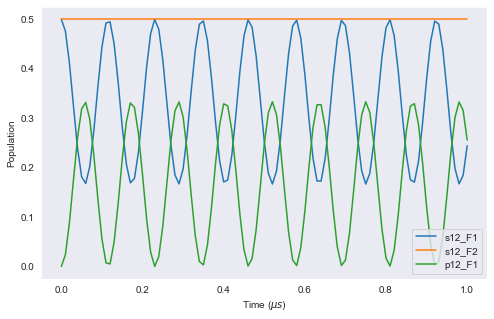

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

import numpy as np

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
# ax.plot(obs.tlist, pop_s12, label='Ground state')
ax.plot(obs.tlist, pop_s12_F1, label='s12_F1')
ax.plot(obs.tlist, pop_s12_F2, label='s12_F2')
ax.plot(obs.tlist, pop_p12_F1, label='p12_F1')
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel(r'Population')
# ax.set_ylim([0.,1])
leg = ax.legend(frameon=True)

# plt.savefig('images/ob-solve-two-rabi-oscillations.png')